<a href="https://colab.research.google.com/github/Tea-Yeon-Kim/AI-Class/blob/main/week5/heart-machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import requests

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/heart.csv"
response = requests.get(url)

with open('heart.csv', 'wb') as file:
    file.write(response.content)

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# 컬렴명 확인
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Target')

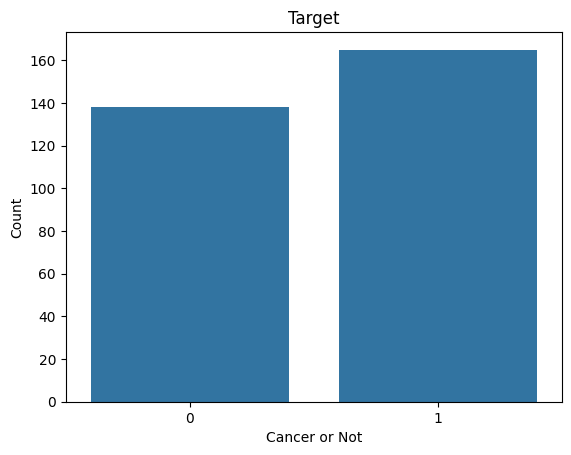

In [ ]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="target")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Target")

In [ ]:
# 레이블 갯수 확인 (숫자)
df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
# 결측치 확인
missing_values = df.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# 결측치 제거
df = df.dropna()

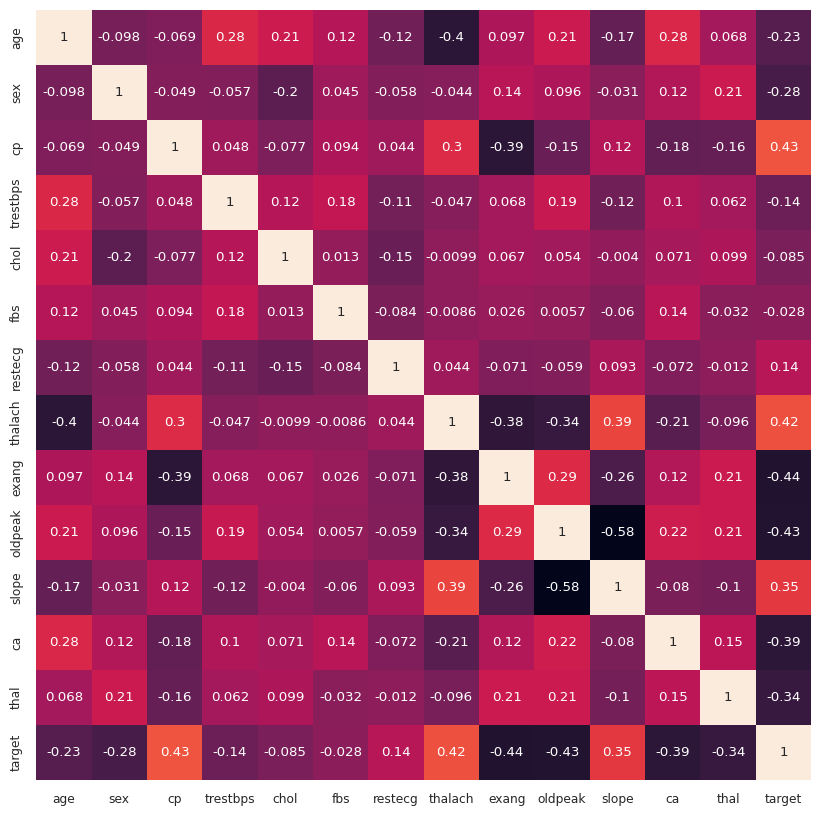

In [ ]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI와 높은 건 SkinThickness

In [ ]:
X=df.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y=df['target']
y.value_counts()

,count
target,
1,165
0,138


In [ ]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


# 머신러닝

In [ ]:
# 데이터 정규화 (평균 0, 표준편차 1로 변환)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [ ]:
# Decision Tree (의사결정나무 분류 모델)
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)  # 모델 학습

dt_pred = dt_model.predict(X_test)  # 테스트 데이터 예측
dt_acc = accuracy_score(y_test, dt_pred)  # 정확도 평가
print(f'Decision Tree Accuracy: {dt_acc:.4f}\n')
print(classification_report(y_test, dt_pred), '\n')
print(confusion_matrix(y_test, dt_pred))

Decision Tree Accuracy: 0.7869

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61
 

[[22  5]
 [ 8 26]]


In [ ]:
# Logistic Regression (로지스틱 회귀 분류 모델)
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print(f'Logistic Regression Accuracy: {lr_acc:.4f}\n')
print(classification_report(y_test, lr_pred, zero_division=1), '\n')
print(confusion_matrix(y_test, lr_pred))

Logistic Regression Accuracy: 0.8525

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61
 

[[21  6]
 [ 3 31]]


In [ ]:
# SVM (서포트 벡터 머신 분류 모델)
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {svm_acc:.4f}\n')
print(classification_report(y_test, svm_pred), '\n')
print(confusion_matrix(y_test, svm_pred))

SVM Accuracy: 0.8689

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61
 

[[21  6]
 [ 2 32]]


In [ ]:
# Random Forest (랜덤 포레스트 분류 모델)
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_acc:.4f}\n')
print(classification_report(y_test, rf_pred), '\n')
print(confusion_matrix(y_test, rf_pred))

Random Forest Accuracy: 0.8525

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61
 

[[22  5]
 [ 4 30]]
